## 실습 가이드

### 탐색적 데이터 분석
1. 데이터 로드 및 확인
2. 데이터 정보 확인
3. missingno 패키지를 이용한 결측값을 가지는 컬럼 확인 및 처리
-  age는 평균으로, cabin 'N', embarked 'N' 으로 대체
4. age , cabin , embarked 빈도확인
5. 성별에 따른 생존여부 확인 및 barplot를 이용한 시각화
- 수업시간에 배운 시각화를 이용하여 다양한 정보를 탐색하세요
6. sex , cabin , embarked 에 대한 라벨 인코딩

### ML학습
1. 원본 데이터를 재로딩 하고, feature데이터 셋과 Label 데이터 셋 추출.
2. 80:20 으로 데이터 분리(train_test_split)
3. 의사결정트리를 이용한 학습, 예측 및 정확도 확인
4. KFold=5 를 이용한 교차검증 및 평균정확도 확인
5. cross_val_score 를 이용한 교차검증 및 평균정확도 확인
6. GridSearchCV 를 이용한 교차검증 및 평균정확도 확인
- 하이퍼 파라미터 적용해보기


In [192]:
import pandas as pd
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### 탐색적 데이터 분석

In [193]:
# 데이터 로드 및 확인
titanic = pd.read_csv('C:/Users/i/data/titanic_train.csv', sep=',')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [194]:
# 데이터 정보 확인
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


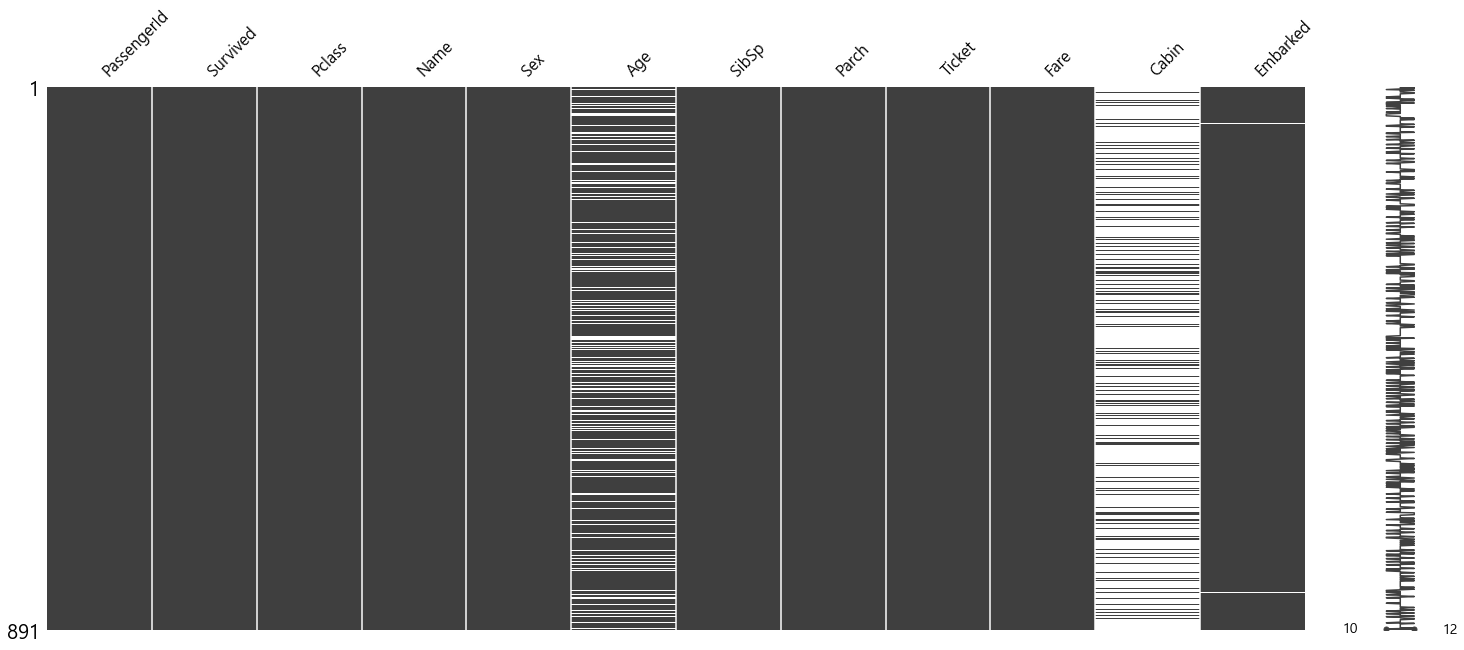

In [195]:
# missingno 패키지를 이용한 결측값을 가지는 컬럼 확인 및 처리
import missingno as msno 
msno.matrix(titanic)
plt.show()

In [196]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

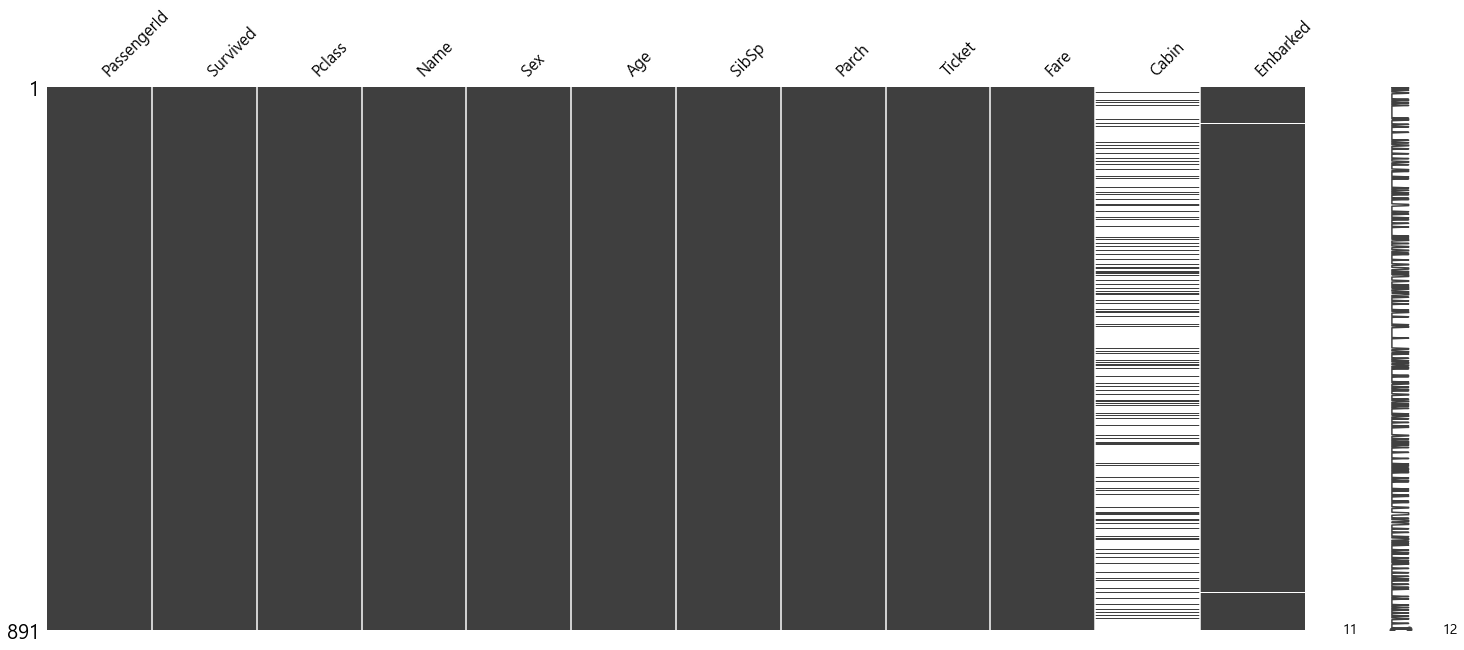

In [197]:
from sklearn.impute import SimpleImputer

# age 평균값으로 대체
titanic_age_imputer = SimpleImputer(strategy = 'mean')
titanic['Age'] = titanic_age_imputer.fit_transform(titanic[['Age']])

msno.matrix(titanic)
plt.show()

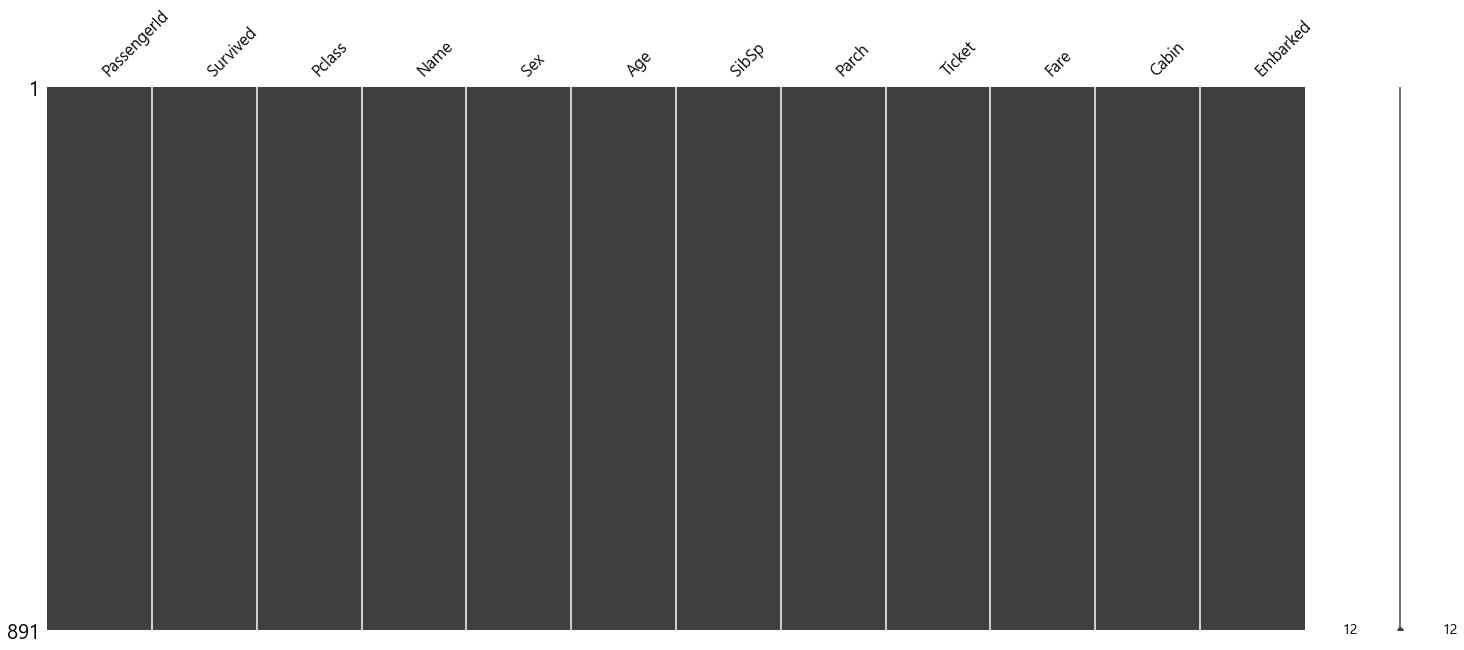

In [198]:
# cabin 'N', embarked 'N' 으로 대체
titanic.Cabin.fillna('N', inplace=True)
titanic.Embarked.fillna('N', inplace=True)
msno.matrix(titanic)
plt.show()

In [199]:
# age , cabin , embarked 빈도확인
age_group = pd.DataFrame(titanic['Age'].value_counts())
age_group

,Age
29.699118,177
24.000000,30
22.000000,27
18.000000,26
28.000000,25
...,...
55.500000,1
53.000000,1
20.500000,1
23.500000,1


In [200]:
# cabin 빈도 확인
titanic['Cabin'].value_counts()

N              687
B96 B98          4
G6               4
C23 C25 C27      4
C22 C26          3
              ... 
E77              1
E31              1
C91              1
A24              1
C32              1
Name: Cabin, Length: 148, dtype: int64

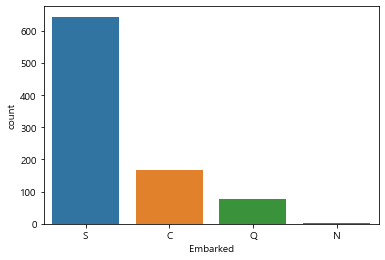

In [201]:
# Embarked 빈도 확인
titanic['Embarked'].value_counts()
sns.countplot(x = 'Embarked', data = titanic)

In [202]:
# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc
# plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

In [203]:
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False # 음수 부호 출력

In [204]:
# 경고 메시지 무시
import warnings
warnings.filterwarnings(action='ignore') 

Text(0.5, 1.0, '성별에 따른 생존 여부')

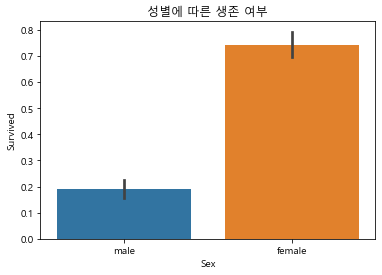

In [205]:
# 성별에 따른 생존여부 확인 및 barplot를 이용한 시각화

sex_group = titanic[['Sex', 'Survived']].groupby('Sex')
sex_group.count()

sns.barplot(x = 'Sex', y = 'Survived', data = titanic)
plt.title('성별에 따른 생존 여부')

In [206]:
# sex , cabin , embarked 에 대한 라벨 인코딩

from sklearn.datasets import load_iris , load_breast_cancer
from sklearn.tree import DecisionTreeClassifier  
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score, cross_validate
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

import pandas as pd
import numpy as np

In [207]:
# sex 에 대한 라벨 인코딩
encoder = LabelEncoder()
encoder.fit(titanic.Sex)
sex_label = encoder.transform(titanic.Sex)
print('encoder' , encoder)
print('encoder 결과' , sex_label)

titanic['Sex'] = sex_label

encoder LabelEncoder()
encoder 결과 [1 0 0 0 1 1 1 1 0 0 0 0 1 1 0 0 1 1 0 0 1 1 0 1 0 0 1 1 0 1 1 0 0 1 1 1 1
 1 0 0 0 0 1 0 0 1 1 0 1 0 1 1 0 0 1 1 0 1 0 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1
 1 1 1 1 1 0 1 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 1
 0 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 0 0 0 1 1 1 1 0
 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 0
 1 0 1 1 1 0 1 0 1 0 0 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 0 1 0 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 0 0 1 1 1 0 1 1 0 0 0 0 0
 0 1 1 1 1 0 1 1 1 0 0 1 1 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1
 1 0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1
 1 0 1 1 0 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 1 1 0 1 1 1 0 0 0 0
 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 1 0 1 0 1 1
 1 1 0 1 1 0 1 1 0 0 0 1 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 1 1 0
 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1

In [208]:
# cabin 에 대한 라벨 인코딩
encoder = LabelEncoder()
encoder.fit(titanic.Cabin)
cabin_label = encoder.transform(titanic.Cabin)
print('encoder' , encoder)
print('encoder 결과' , cabin_label)

titanic['Cabin'] = cabin_label

encoder LabelEncoder()
encoder 결과 [146  81 146  55 146 146 129 146 146 146 145  49 146 146 146 146 146 146
 146 146 146 111 146  13 146 146 146  63 146 146 146  41 146 146 146 146
 146 146 146 146 146 146 146 146 146 146 146 146 146 146 146 146 101 146
  23  71 146 146 146 146 146  21  80 146 146 146 142 146 146 146 146 146
 146 146 146 140 146 146 146 146 146 146 146 146 146 146 146 146  63 146
 146 146 122 146 146 146  12  91 146 146 146 146  98 146 146 146 146 146
 146 146  52 146 146 146 146 146 146 146  36 146 146 146 146 116  98 146
 146 146 138 146 146 146 146 146 146 146 107  55 146  45 146 146 146 146
 146 146 146 146 141 146 146  61 146 146 146 146 146 146 146 146 146 146
 146 146 146 146 123 146 146 146  18 146 146 146  14 146 146  69 146 146
 146 146 146 144 146   9 146 146 146 146 146 146 146 141  28  43 146 146
 146 146 146 146 146 146 146 145 146 146 146   8 146 146 146 146 146 103
 146 146  93 146 146 146 146 146  87 146 146 146 146 146  80 146 146 146
 146 146 146 146 

In [209]:
# embarked 에 대한 라벨 인코딩
encoder = LabelEncoder()
encoder.fit(titanic.Embarked)
embarked_label = encoder.transform(titanic.Embarked)
print('encoder' , encoder)
print('encoder 결과' , embarked_label)

titanic['Embarked'] = embarked_label

encoder LabelEncoder()
encoder 결과 [3 0 3 3 3 2 3 3 3 0 3 3 3 3 3 3 2 3 3 0 3 3 2 3 3 3 0 3 2 3 0 0 2 3 0 3 0
 3 3 0 3 3 0 0 2 3 2 2 0 3 3 3 0 3 0 3 3 0 3 3 0 1 3 3 0 0 3 3 3 3 3 3 3 0
 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 3 3 3 3 3 3 3 3 3 3 3 2 3
 0 3 3 0 3 2 3 0 3 3 3 0 3 3 0 2 3 0 3 0 3 3 3 3 0 3 3 3 0 0 3 3 2 3 3 3 3
 3 3 3 3 3 3 3 0 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 0 3 3 0 3 3 3 0 3 3 3
 3 2 3 2 3 3 3 3 3 0 0 2 3 2 3 3 3 3 0 3 3 3 0 2 0 3 3 3 3 2 0 3 3 0 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 2 3 3 0 2 3 3 3 3 3 3 3 3 3 0 0 3 0
 3 2 3 3 3 2 3 3 3 3 3 3 3 3 0 2 3 3 3 2 3 2 3 3 3 3 0 3 3 3 2 3 0 0 3 3 0
 0 3 3 0 2 2 3 2 3 3 0 0 0 0 0 0 3 3 3 3 3 3 3 0 3 3 2 3 3 0 3 3 3 0 2 3 3
 3 3 3 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 3 0 3 3 3 2 2 3 0 0 3 2 3 0 0 2 0
 0 3 3 0 3 0 3 0 0 3 0 0 3 3 3 3 3 3 2 0 3 3 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 2 2 3 3 3 3 3 3 3 0 2 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 0 3 3 3 0 0 3 0 3 3 3 2 3 3 3 3 3 3 3 3 2 0 3 3 3 0 3 3 3

#### ML학습

In [238]:
from sklearn import preprocessing
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# 원본 데이터를 재로딩하고, feature 데이터 셋과 Label 데이터 셋 추출.
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.000000,1,0,7.2500,146,3
1,1,1,0,38.000000,1,0,71.2833,81,0
2,1,3,0,26.000000,0,0,7.9250,146,3
3,1,1,0,35.000000,1,0,53.1000,55,3
4,0,3,1,35.000000,0,0,8.0500,146,3
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,146,3
887,1,1,0,19.000000,0,0,30.0000,30,3
888,0,3,0,29.699118,1,2,23.4500,146,3
889,1,1,1,26.000000,0,0,30.0000,60,0


In [243]:
y_titanic_df= titanic['Survived']
X_titanic_df=titanic.drop('Survived' , axis=1)

In [244]:
# 데이터 분리
X_train , X_test , y_train , y_test = train_test_split( X_titanic_df , y_titanic_df , 
                                                       test_size=0.2 , 
                                                       random_state=11)

In [245]:
# 학습기 생성
titanic_clf = DecisionTreeClassifier(random_state=11)

In [246]:
# 학습 수행
titanic_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=11)

In [247]:
# 예측 수행
pred = titanic_clf.predict(X_test)
print('예측 정확도 : {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도 : 0.7989


In [257]:
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    # 폴드 세트를 5개인 KFold 객체를 생성, 폴드 수만큼 예측 결과 저장을 위한 리스트 객체 생성.
    kfold = KFold(n_splits=folds)
    
    scores = []

    # kFold 교차 검증 수행

    for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):

        # X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
        X_train , X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train , y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]

        #Classifier 학습, 예측, 정확도 계산
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test , predictions)
        scores.append(accuracy)
        print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))

        # 5개의 fold에서의 평균 정확도 계산
        mean_score = np.mean(scores)
        print("평균 정확도: {0:.4f}".format(mean_score))

#exec_kfold 호출
exec_kfold(titanic_clf, folds=5)

교차 검증 0 정확도: 0.7486
평균 정확도: 0.7486
교차 검증 1 정확도: 0.7640
평균 정확도: 0.7563
교차 검증 2 정확도: 0.8202
평균 정확도: 0.7776
교차 검증 3 정확도: 0.7809
평균 정확도: 0.7784
교차 검증 4 정확도: 0.7921
평균 정확도: 0.7812


In [262]:
# cross_val_score 를 이용한 교차검증 및 평균정확도 확인

from sklearn.model_selection import cross_val_score

scores = cross_val_score(titanic_clf, X_titanic_df, y_titanic_df, cv=5)
for iter_count, accuracy in enumerate(scores):
    print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))

print("평균 정확도: {0:.4f}".format(np.mean(scores)))

교차 검증 0 정확도: 0.7486
교차 검증 1 정확도: 0.7753
교차 검증 2 정확도: 0.8090
교차 검증 3 정확도: 0.7584
교차 검증 4 정확도: 0.8034
평균 정확도: 0.7789


In [269]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

parameters = {'max_depth' : [2,3, 5, 10],
              'min_samples_split':[2,3,5], 'min_samples_leaf':[1,5,8]}

grid_dclf = GridSearchCV(titanic_clf, param_grid=parameters, scoring='accuracy', cv=5)
grid_dclf.fit(X_train, y_train)

print('GridSearchCV 최적 하이퍼 파라미터 :' , grid_dclf.best_params_)
print('GridSearchCV 최고 정확도 : {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5}
GridSearchCV 최고 정확도 : 0.7993
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8659
